In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gapminder_five_years.csv')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957.0,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962.0,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967.0,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972.0,36.088,13079460.0,739.981106


In [3]:
# Get the number of rows and columns
df.shape

(1704, 6)

In [4]:
# Get the column names
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [5]:
# Get data type of each column
df.dtypes

country       object
continent     object
year         float64
lifeExp      float64
pop          float64
gdpPercap    float64
dtype: object

In [32]:
# Change data type of a column
df['year']= df['year'].astype('Int64')

In [33]:
df.dtypes

country       object
continent     object
year           Int64
lifeExp      float64
pop          float64
gdpPercap    float64
dtype: object

In [6]:
# Get more infomration about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1632 non-null   object 
 2   year       1632 non-null   float64
 3   lifeExp    1632 non-null   float64
 4   pop        1632 non-null   float64
 5   gdpPercap  1632 non-null   float64
dtypes: float64(4), object(2)
memory usage: 80.0+ KB


# Access columns and rows

In [7]:
# Get a column or a subset of columns
country_df = df['country']
subset = df[['country', 'year', 'continent']]
subset.head()

,country,year,continent
0,Afghanistan,1952.0,Asia
1,Afghanistan,1957.0,Asia
2,Afghanistan,1962.0,Asia
3,Afghanistan,1967.0,Asia
4,Afghanistan,1972.0,Asia


In [10]:
# Get a particular row
#loc: Purely label-location based indexer for selection by label.
#iloc: Purely integer-location based indexing for selection by position.
df.iloc[0]  #or ==df.loc[0] in this case

country      Afghanistan
continent           Asia
year              1952.0
lifeExp           28.801
pop            8425333.0
gdpPercap     779.445314
Name: 0, dtype: object

In [13]:
# Get the last row
df.iloc[-1]

country        Zimbabwe
continent        Africa
year             2007.0
lifeExp          43.487
pop          12311143.0
gdpPercap    469.709298
Name: 1703, dtype: object

In [12]:
# Get a subset of rows
df.iloc[[0,99,999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952.0,28.801,8425333.0,779.445314
99,Bangladesh,Asia,1967.0,43.453,62821884.0,721.186086
999,Mongolia,Asia,1967.0,51.253,1149500.0,1226.041130


In [14]:
# Access a cell (Continent of the first record)
df.iloc[0,1]

'Asia'

In [15]:
# Get portion of data
df.iloc[0:5,0]     

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [16]:
df.loc[0:5,'country']   #Note the difference in the number of rows. Avoid using slicing with loc

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
5    Afghanistan
Name: country, dtype: object

In [19]:
df.iloc[0:5,[0,1]]

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia


# Aggregations

In [49]:
global_yearly_life_exp = df.groupby('year')['lifeExp'].mean()
global_yearly_life_exp.head()

year
1952    49.219934
1957    51.638706
1962    53.729253
1967    55.776317
1972    57.695514
Name: lifeExp, dtype: float64

In [41]:
# Multi-level group by
multi_group = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
multi_group.head(10)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.075840   1244.552090
     Americas   53.279840   4079.062552
     Asia       46.115793   5706.757357
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.202900   1376.227169
     Americas   55.960280   4616.043733
     Asia       49.035516   6327.674204
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455

In [42]:
# To flatten this, use reset_index()
flat = multi_group.reset_index()
flat.head(10)

,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.075840,1244.552090
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.115793,5706.757357
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.202900,1376.227169
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.035516,6327.674204
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


In [47]:
# Aggregation: Count distinct. For count, use count()
df.groupby('continent')['country'].nunique()

continent
Africa      50
Americas    25
Asia        29
Europe      30
Oceania      2
Name: country, dtype: int64

# Basic Plotting

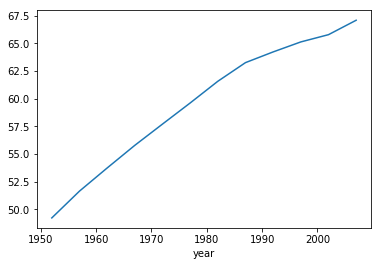

In [50]:
global_yearly_life_exp.plot();